## Machine, Data and Learning

## Assignment 2
# 2022113009

## Task 3,4,5

## Importing of Libraries

In [1]:
import numpy as np
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd
import matplotlib.pyplot as plt
from random import sample


## Reading of the Data Pickle

In [2]:
data = []
with (open("data.pickle", "rb")) as openfile:
    while True:
        try:
            data.append(pickle.load(openfile))
        except EOFError:
            break
    

## Separating the test and the training data from the dictionary

In [3]:
training_data = data[0]["train"]

In [4]:
test_data = data[0]["test"]

## Dividing the training data into 15 random equal groups

In [5]:
trainDataList = []


for i in range(15):
    trainDataList.append(training_data[sample(range(len(training_data)), len(training_data) // 15)])

In [6]:
len(trainDataList[0])


500

In [7]:
trainDataList

[array([[5.78218593e+01, 2.27519075e+01],
        [4.33159635e+01, 1.96776876e+01],
        [4.61837590e+01, 2.75894533e+01],
        [4.96835250e+00, 2.69872684e+01],
        [7.15790400e+01, 1.98366484e+01],
        [3.59275804e+01, 2.33578968e+01],
        [6.02474115e+01, 1.98804959e+01],
        [1.17369763e+01, 2.35708148e+01],
        [2.45053745e+01, 1.71113256e+01],
        [1.19921960e+01, 2.41123359e+01],
        [7.83359470e+01, 1.74367621e+01],
        [1.33244637e+00, 3.17521921e+01],
        [8.24506693e+01, 2.60120317e+01],
        [9.23423810e+01, 1.42565732e+01],
        [3.23435673e+01, 1.82934586e+01],
        [7.46703902e+01, 1.70287029e+01],
        [6.10623021e+01, 2.15449449e+01],
        [9.84360403e+01, 1.63043327e+01],
        [7.68115298e+01, 2.40828822e+01],
        [8.99262496e+01, 1.48812759e+01],
        [1.91212452e+00, 1.86044040e+01],
        [5.16298017e+01, 1.55230337e+01],
        [7.52901444e+01, 1.83638933e+01],
        [5.34389518e+01, 1.5049895

In [8]:
meanVariance = []
meanBias = []
meanSquaredBias = []
MSE = []
IRE = []
predictedValues = []
avgPredictedValues = []

MAX_ORDER = 10
NUM_TRAIN_SETS = 15

## Fitting the data and predicting values

In [9]:
for i in range(MAX_ORDER):
    predicted_values = []
    for j in range(NUM_TRAIN_SETS):
        poly = PolynomialFeatures(degree=i+1)
        qp = trainDataList[j][:, 0].reshape(-1, 1)
        poly_x = poly.fit_transform(qp)
        qy = trainDataList[j][:,1].reshape(-1, 1)
        regressor = LinearRegression().fit(poly_x, qy)
        qt = test_data[:, 0].reshape(-1, 1)
        predicted_values.append(regressor.predict(poly.transform(qt)))
    predictedValues.append(predicted_values)
    avgPredictedValues.append(np.mean(predicted_values, axis=0))

In [10]:
len(predictedValues)

10

In [11]:
predictedValues

[[array([[21.79322432],
         [23.04415249],
         [20.58788625],
         [19.78726023],
         [18.01484538],
         [23.02335701],
         [16.44318691],
         [19.29856642],
         [19.10340883],
         [17.50455627],
         [17.08704699],
         [17.43497139],
         [19.58570402],
         [20.72545635],
         [23.77919276],
         [19.7712637 ],
         [20.26715594],
         [20.47671041],
         [24.05993176],
         [20.19117245],
         [19.9392272 ],
         [22.69062931],
         [16.97587115],
         [20.59668433],
         [19.73687118],
         [23.13213337],
         [19.22978137],
         [22.46107919],
         [23.98074896],
         [22.70262671],
         [16.14885087],
         [21.97318522],
         [16.93188071],
         [21.36931644],
         [18.93304585],
         [23.77039468],
         [16.71512781],
         [16.53836622],
         [23.37528053],
         [22.69142914],
         [17.11424108],
         [20.726

## Calculation of Bias,Variance, Bias^2 ,MSE and Irreducible Error

In [12]:

for i in range(MAX_ORDER):
    meanVariance.append(np.mean(np.var(predictedValues[i], axis=0)))


for i in range(MAX_ORDER):
    yset = np.split(test_data, 2, axis = 1)[1]
    meanBias.append(np.mean((avgPredictedValues[i] - yset )))
    meanSquaredBias.append(np.mean((avgPredictedValues[i] - yset )**2))


for i in range(MAX_ORDER):
    mse = 0
    for j in range(NUM_TRAIN_SETS):
        yset = np.split(test_data, 2, axis = 1)[1]
        mse = mse + np.mean((predictedValues[i][j] - yset)**2)
    mse = mse/NUM_TRAIN_SETS
    MSE.append(mse)


for i in range(MAX_ORDER):
    IRE.append(MSE[i] - (meanSquaredBias[i] + meanVariance[i]))

## Tabulation of Mean Bias and Variance computed over the 15 models 

In [13]:

table1 = pd.DataFrame(np.array([meanVariance,meanBias]).T)
table1.columns = ["Mean Variance", "Mean Bias"]
table1.index = range (1, MAX_ORDER+1)
print(table1)

    Mean Variance  Mean Bias
1        0.043729  -0.193878
2        0.099439  -0.187901
3        0.137137   0.077688
4        0.174253   0.056970
5        0.183786   0.054396
6        0.249369   0.054376
7        0.282506   0.053813
8        0.254752   0.036530
9        0.234194   0.002128
10       0.240117  -0.030683


In [14]:
MSE

[1.0207312930891714,
 1.0234568345614745,
 0.18023369165474518,
 0.21482674378890293,
 0.222438233755635,
 0.28902273248409766,
 0.3212546206190437,
 0.30079591912727655,
 0.34329275670531817,
 0.5112962219796434]

## Tabulation of Irreducible Error

In [15]:

table2 = pd.DataFrame(np.array([IRE]).T)
table2.columns = ["Irreducible Error"]
table2.index = range(1, MAX_ORDER+1)
print(table2)

    Irreducible Error
1        8.881784e-16
2        4.440892e-16
3        5.551115e-17
4        0.000000e+00
5       -2.775558e-17
6        5.551115e-17
7       -1.665335e-16
8       -2.220446e-16
9        1.665335e-16
10      -1.110223e-16


## Plotting the Graph

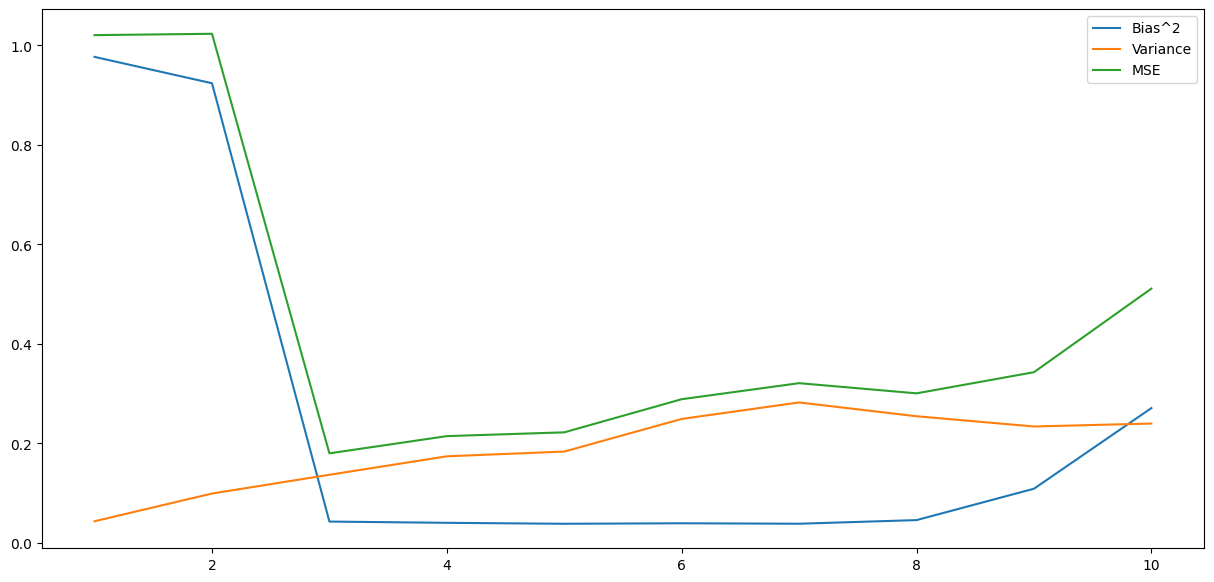

In [16]:

plt.figure(figsize=(15, 7))
x = range(1, 11)
plt.plot(x, meanSquaredBias[0:10], label="Bias^2")
plt.plot(x, meanVariance[0:10], label="Variance")
plt.plot(x, MSE[0:10], label="MSE")
plt.legend()
plt.show()